<font color = green >

# Pandas
</font>

In [39]:
import pandas as pd 

In [40]:
# import os
# cwd= os.getcwd() # current working directory
# print (cwd)

In [41]:
pd.__version__

'1.3.2'

In [42]:
pd.__file__

'c:\\Users\\havrylov.mykola\\Desktop\\work\\python\\DS_Kemp\\venv\\lib\\site-packages\\pandas\\__init__.py'

<font color = green >

# Series
</font>

<img src = "img/series1.jpg" height=150 width= 150 align="left">
<img src = "img/series.jpg" height=500 width= 500 align="left">



<font color = green >

### Create series
</font>

In [43]:
ser= pd.Series(range(4), index = ('A',1,'A',2))
ser

A    0
1    1
A    2
2    3
dtype: int64

In [44]:
ser= pd.Series((1,2,3,4)) # automatically assigns indices
ser

0    1
1    2
2    3
3    4
dtype: int64

In [45]:
ser = pd.Series({'a':0, 'b':1}, name='created_from_dict')
ser

a    0
b    1
Name: created_from_dict, dtype: int64

<font color = green >

### None type objects
</font>

In [46]:
# series of str 
ser= pd.Series(['c3pio', 'r2d2', None])
ser

0    c3pio
1     r2d2
2     None
dtype: object

In [47]:
ser[2] == None

True

In [48]:
ser[2] is None

True


[is None vs == None](https://stackoverflow.com/questions/3257919/what-is-the-difference-between-is-none-and-none)

It is more proper to use is None e.g. `== None` may be even not boolean:



In [49]:
import numpy as np 
a= np.zeros(3)
print(a == None)
print(a is None)

[False False False]
False


In [50]:
# series of numbers  
ser = pd.Series([1, 3, None])

In [51]:
print(ser[2])
type(ser[2])

nan


numpy.float64

In [52]:
ser[2]

nan

In [53]:
ser[2] is None

False

In [54]:
import numpy as np
np.nan == np.nan

False

In [55]:
np.isnan(ser[2])

True

<font color = green >

### Quering the series
</font>

In [56]:
ser = pd.Series({'a':'val0', 'b':'val1', 'c':'val2',  2:'val3'})
print (f'Series:\n{ser}')
# Note loc, iloc are attributes not functions
print ('\nser.iloc[2]=', ser.iloc[2]) # explicit by index position
print ("ser.loc['c']=", ser.loc['c']) # explicit by index label
try:
    print ("\nTry ser.iloc['c']")
    ser.iloc['c'] # explicit by str or absent index
except Exception as e:
    print (e) 

# Note: Use explicit if possible to avoid unexpected results 

try:
    print ('\nTry ser[0]')
    ser[0] # It does not resolve to iloc now though it did 
except KeyError as e:
    print ('KeyError:', e) 

# print ('ser[1]=',ser[1]) # resolves to iloc since no such index label
print ('\nresolves to loc:\nser[2]=', ser[2]) # resolves to loc 
print ("ser['b']=", ser['b']) # resolves to loc 

Series:
a    val0
b    val1
c    val2
2    val3
dtype: object

ser.iloc[2]= val2
ser.loc['c']= val2

Try ser.iloc['c']
Cannot index by location index with a non-integer key

Try ser[0]
KeyError: 0

resolves to loc:
ser[2]= val3
ser['b']= val1


<font color = green >

### Duplicated indices
</font>

In [57]:
# Note: you cannot provide duplicated indices using dict 
ser = pd.Series({'a':1, 'a':2} )
print (ser) # just last value provided
print (f"ser ['a'] = {ser ['a']}")
ser = pd.Series([3, 4], index=['a', 'a'])
print (f"\nser ['a'] = \n{ser['a']}") # selects all elements with index label 
ser.loc ['a'] # the same 

a    2
dtype: int64
ser ['a'] = 2

ser ['a'] = 
a    3
a    4
dtype: int64


a    3
a    4
dtype: int64

<font color = green >
    
#### Queuring all elements
</font>

In [58]:
ser.values # query all elements 

array([3, 4], dtype=int64)

In [59]:
ser.index # query index 

Index(['a', 'a'], dtype='object')

<font color = green >

#### Slizing
</font>

In [60]:
ser = pd.Series([1, 2,3], index=['a', 'b', 2] )
ser.iloc[:3]

a    1
b    2
2    3
dtype: int64

***
<font color = green >
    
### Set value
</font>

In [61]:
ser.loc[3] = 'added item'  # use to add new
print (ser) 
ser.loc[3]= 'modified item'  # use to update 
print (ser)

a             1
b             2
2             3
3    added item
dtype: object
a                1
b                2
2                3
3    modified item
dtype: object


*** 
<font color = green >

### Append
</font>

In [62]:
ser.append(pd.Series({4:5})) 
print (ser) # check it is not updated
ser = ser.append(pd.Series({4:6}))
print (ser)

a                1
b                2
2                3
3    modified item
dtype: object
a                1
b                2
2                3
3    modified item
4                6
dtype: object


*** 
<font color = green >

# DataFrame
</font>

<img src = "img/df.jpg" height=800 width= 800 align="left">

In [63]:
# Note: show the picture in ppt

<font color = green >

### Creating DataFrame
</font>

<font color = green >
    
#### Create DataFrame with single element dictionary
</font>

In [64]:
pd.DataFrame({'model':['mercedes','toyota','peugeot']}) # just list 

,model
0,mercedes
1,toyota
2,peugeot


<font color = green >

#### Create DataFrame with two elements dictionary
</font>

In [65]:
pd.DataFrame({'model':['mercedes','toyota','peugeot'], 'color': ['red', 'grey', 'blue']}) # two lists 

,model,color
0,mercedes,red
1,toyota,grey
2,peugeot,blue


<font color = green >

#### Create DataFrame providing index
</font>

In [66]:
pd.DataFrame( ['100', '200', '300'], index=[2016, 2017,2018 ]) # list and index 

,0
2016,100
2017,200
2018,300


<font color = green >

#### Create DataFrame by providing dictionary for every row
</font>

In [67]:
# this places every dict horizontally 
df = pd.DataFrame([
    pd.Series ({'name': 'Oksana', 'age': 25, 'gender': 'female'}),
    pd.Series ({'name': 'Taras', 'age': 18, 'gender': 'male'}),
    pd.Series ({'name': 'Conchita', 'age': 30, 'gender': None})]
) 
df 

,name,age,gender
0,Oksana,25,female
1,Taras,18,male
2,Conchita,30,None


<font color = green >

#### Create DataFrame from list of tuples
</font>

In [68]:
pd.DataFrame([('mercedes', 'red'), ('toyota', 'grey'), ('peugeot', 'blue')], columns = ['brand', 'color'])

,brand,color
0,mercedes,red
1,toyota,grey
2,peugeot,blue


#### Similar from dict items 

In [69]:
a= {'mercedes':'red','toyota':'grey','peugeot': 'blue'}
df = pd.DataFrame(a.items(), columns = ['brand', 'color'])
df 

,brand,color
0,mercedes,red
1,toyota,grey
2,peugeot,blue


<font color = green >

#### Create DataFrame by providing 2 dimensional lists 
</font>

In [70]:
# Similar to horizontal allows to provide list instead of dictionaries for every row 
df = pd.DataFrame([['mercedes', 'c-180', 'red'], 
              ['toyota', 'landcruiser', 'grey'],
              ['toyota', 'Rav4', 'blue'],
              [ 'peugeot', '207', 'red']], columns = ['brand','model', 'color'])

df.set_index(['brand']) # this is not inplace operation
df


,brand,model,color
0,mercedes,c-180,red
1,toyota,landcruiser,grey
2,toyota,Rav4,blue
3,peugeot,207,red


<font color = green >

#### Create DataFrame and set multi-level index
</font>

In [71]:
df = pd.DataFrame({'brand':['mercedes','toyota','peugeot'], 
              'color': ['red', 'grey', 'blue'],
              'volume': [100, 200, None], 
              'mode': ['rear drive','awd', 'front drive']
              }).set_index(['brand', 'color'])
df 

,,volume,mode
brand,color,,
mercedes,red,100.0,rear drive
toyota,grey,200.0,awd
peugeot,blue,NaN,front drive


<font color = green >

### List columns
</font>

In [72]:
print (df.columns) 
list(df) # alternative

Index(['volume', 'mode'], dtype='object')


['volume', 'mode']

<font color = green >

### List indices
</font>

In [73]:
print (df.index)
print (df.index[0])
print (df.index[2])

MultiIndex([('mercedes',  'red'),
            (  'toyota', 'grey'),
            ( 'peugeot', 'blue')],
           names=['brand', 'color'])
('mercedes', 'red')
('peugeot', 'blue')


***
<font color = green >

### Quering DataFrames
</font>

<font color = green >

#### Quering by index label
</font>

In [74]:
df.loc['toyota'] # Note: if the result is multi rows then it remains DataFrame


,volume,mode
color,,
grey,200.0,awd


In [75]:
df = pd.DataFrame([['mercedes', 'c-180', 'red'], 
              ['toyota', 'landcruiser', 'grey'],
              ['toyota', 'Rav4', 'blue'],
              [ 'peugeot', '207', 'red']], columns = ['brand','model', 'color'])

# df.set_index(['brand'], inplace= True)
df
# df.iloc[0,2] # Note: if the result is single row then it becomes Series 


,brand,model,color
0,mercedes,c-180,red
1,toyota,landcruiser,grey
2,toyota,Rav4,blue
3,peugeot,207,red


<font color = green >

#### Quering by single column
</font>

In [76]:
df = pd.DataFrame([['mercedes', 'c-180', 'red'], 
              ['toyota', 'landcruiser', 'grey'],
              ['toyota', 'Rav4', 'blue'],
              [ 'peugeot', '207', 'red']], columns = ['brand','model', 'color'])

df['brand'] # note returned series 
# Note: columsn always have a label thus direct calling is always label based for columns 

0    mercedes
1      toyota
2      toyota
3     peugeot
Name: brand, dtype: object

#### Keep as frame 

In [77]:
df['brand'].to_frame()

,brand
0,mercedes
1,toyota
2,toyota
3,peugeot


<font color = green >

#### Quering by multi columns
</font>

In [78]:
df[['model','color']] # note 2 brackets 

,model,color
0,c-180,red
1,landcruiser,grey
2,Rav4,blue
3,207,red


<font color = green >

#### Quering by rows and columns
</font>

In [79]:
df.iloc[1:,:2] # using iloc

,brand,model
1,toyota,landcruiser
2,toyota,Rav4
3,peugeot,207


<font color = green >

#### Chaining
</font>

In [80]:
df.iloc[3]['brand'] # Note: avoid if possible  

'peugeot'

In [81]:
# this is the case of getting warning
df = pd.DataFrame([list('abcd'),list('efgh'),list('ijkl'),list('mnop')], columns=pd.MultiIndex.from_product([['one','two'],['first','second']]))
df['one'].iloc[1] = 0
df



c:\Users\havrylov.mykola\Desktop\work\python\DS_Kemp\venv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\havrylov.mykola\Desktop\work\python\DS_Kemp\venv\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

<font color = green >

#### Instead of chaining 
</font>

In [82]:
df.loc[1,('one','second')]= 'modified'
df

one             two       
  first    second first second
0     a         b     c      d
1     e  modified     g      h
2     i         j     k      l
3     m         n     o      p

<font color = green >

#### Use copy to avoid ambiguity with view/copy
</font>

In [83]:
ser = df['one'].copy()
ser.iloc[1] = 0
ser


,first,second
0,a,b
1,0,0
2,i,j
3,m,n


<font color = green >

#### Bolean mask
</font>

In [84]:
import pandas as pd
df = pd.DataFrame([['mercedes', 'c-180', 'red'], 
              ['toyota', 'landcruiser', 'grey'],
              ['toyota', 'Rav4', 'blue'],
              [ 'peugeot', '207', 'red']])
df.columns = ['brand','model', 'color']

df

,brand,model,color
0,mercedes,c-180,red
1,toyota,landcruiser,grey
2,toyota,Rav4,blue
3,peugeot,207,red


In [85]:
mask =[True, True, False, False] 
df.loc[mask] # df[mask] also works but not recommended  

,brand,model,color
0,mercedes,c-180,red
1,toyota,landcruiser,grey


<font color = green >

#### Conditional query
</font>

In [86]:
df['model'].str.len()>8 # this returns Series that be used as bolean mask 

0    False
1     True
2    False
3    False
Name: model, dtype: bool

In [87]:
df[df['brand'].str.contains('o')] # inside the first brackets is bolean mask

,brand,model,color
1,toyota,landcruiser,grey
2,toyota,Rav4,blue
3,peugeot,207,red


<font color = green >

#### Multi criteria
</font>

In [88]:
df['engine'] = [2, 3, 1.6, 1.4]
df
df [(df.engine >1.8) & (df['brand'].str.startswith('m'))]


,brand,model,color,engine
0,mercedes,c-180,red,2.0


<font color = green >

#### Where
</font>

In [89]:
df['configuration'] = [1,None,2,0]
df['custom_where'] = df['brand'].where(cond=(~df['configuration'].isnull()), other=df['model'])
df

,brand,model,color,engine,configuration,custom_where
0,mercedes,c-180,red,2.0,1.0,mercedes
1,toyota,landcruiser,grey,3.0,NaN,landcruiser
2,toyota,Rav4,blue,1.6,2.0,toyota
3,peugeot,207,red,1.4,0.0,peugeot


***
<font color = green >

### Read file with pandas
</font>

In [90]:
import os
import pandas as pd 
path = os.getcwd() # current working directory
path


'c:\\Users\\havrylov.mykola\\Desktop\\work\\python\\DS_Kemp\\lesson_3_pandas'

<font color = green >

#### Read csv
</font>

In [91]:
# file_name=  os.path.join(path , 'fruits.csv')
file_name=  'fruits.csv'

df = pd.read_csv(file_name, sep = ',', header=None,
                 dtype = None, skiprows=2, nrows= 7, encoding='utf-8')
df

,0,1,2,3
0,1002,Avocado,5,182
1,1003,Banana,5,187
2,1004,Bilberry,5,160
3,1005,Blackberry,4,178
4,1006,Blackcurrant,5,102
5,1007,Blueberry,6,156
6,1008,Currant,5,194


<font color = green >

#### Read xslx
</font>

In [92]:
file_name= 'gdplev.xls'

df= pd.read_excel(file_name, skiprows=5)
df.head()

,Unnamed: 0,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,Unnamed: 3,Unnamed: 4,GDP in billions of current dollars.1,GDP in billions of chained 2009 dollars.1,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929.0,104.6,1056.6,NaN,1947q1,243.1,1934.5,NaN
3,1930.0,92.2,966.7,NaN,1947q2,246.3,1932.3,NaN
4,1931.0,77.4,904.8,NaN,1947q3,250.1,1930.3,NaN


<font color = green >

#### Read txt (rows)
</font>

In [93]:
file_name=  'university_towns.txt'
df = pd.read_fwf(file_name, header=None)
df.columns = ['town']
df.head()

,town
0,Alabama[edit]
1,Auburn (Auburn University)[1]
2,Florence (University of North Alabama)
3,Jacksonville (Jacksonville State University)[2]
4,Livingston (University of West Alabama)[2]


<font color = green >

#### Read txt (saves table)
</font>

In [94]:
file_name=  'fruit_data_with_colors.txt'
df = pd.read_table(file_name) 
# df = pd.read_csv(file_name, sep='\t') 
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


<font color = green >

### Read SQL
</font>

In [95]:
from sqlalchemy import create_engine
# db_url = 'mysql+pymysql://{}:{}@{}/{}?charset=utf8'.format(user, password, host, database)
# engine = create_engine(db_url)
# query = "SELECT * FROM table_name LIMIT 10"
# df = pd.read_sql(query,engine) 

***
<font color = green >

### Write file with pandas
</font>

<font color = green >

#### Write DataFrame to csv
</font>

In [96]:
file_name=  'output.csv'
df.to_csv(file_name, encoding='utf-8', sep=',',index= False) # use sep '\t' for .tsv

with open(file_name) as f:
    content = f.read()
print (content[:200])

fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
1,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
1,apple,granny_smith,176,7.4,7.2,0.6
2,mandarin,mandarin,


<font color = green >

#### Write DataFrame to xslx
</font>

In [97]:
df.to_excel('output.xlsx')

***
<font color = green >

### Operations with two DataFrames
</font>

<font color = green >

#### Append DataFrames
</font>

In [98]:
# Append rows of other to the end of this frame, returning a new object
import pandas as pd
template = 'hello  data   science'
df= pd.DataFrame()
for i in range (7):
    df1 = pd.DataFrame({'col1': [template[i]],
                    'col2': [template[i+7]],
                    'col3': [template[i+14]],
                    }, index= [i])

    df = df.append(df1)
print (df)
df.T

  col1 col2 col3
0    h    d    s
1    e    a    c
2    l    t    i
3    l    a    e
4    o         n
5              c
6              e


,0,1,2,3,4,5,6
col1,h,e,l,l,o,,
col2,d,a,t,a,,,
col3,s,c,i,e,n,c,e


#### You may use Series or dict  to append 

In [99]:
df= pd.DataFrame({'a': [1],
                'b':[2] ,
                'c': [3]})
df1 = df.append (pd.Series ({'a': 4,
                'b':5 ,
                'c': 6}), ignore_index=True)

# Note: append is not inplace operation 

print (df1)
print ('\nOr even without using pd.series\n')

df2 = df.append ({'a': 4,
                'b':5 ,
                'c': 6}, ignore_index=True)
df2

   a  b  c
0  1  2  3
1  4  5  6

Or even without using pd.series



,a,b,c
0,1,2,3
1,4,5,6


<font color = green >

#### Append DataFrames with different columns
</font>

In [100]:
df1 = pd.DataFrame({'col1': [1,2],
                    'col2': [3,4]})
df2 = pd.DataFrame({'col2': [5,6],
                    'col3': [7,8]})
df = df1.append(df2, sort= True)
df                    


,col1,col2,col3
0,1.0,3,NaN
1,2.0,4,NaN
0,NaN,5,7.0
1,NaN,6,8.0


<font color = green >

#### Merge
</font>

In [101]:
# Merge DataFrame objects by performing a database-style join operation by columns (or indexes)
df1 = pd.DataFrame([['mercedes', 'c-180', 'red'], 
              ['toyota', 'landcruiser', 'grey'],
              ['toyota', 'Rav4', 'blue'],
              [ 'peugeot', '207', 'red']], columns = ['brand','model', 'color'])
print (df1)
df2 = pd.DataFrame([['mercedes', 'c-180', 'automat'], 
              ['toyota', 'landcruiser', 'automat'],
              ['toyota', 'corolla', 'CVT'],
              [ 'peugeot', '207', 'manual'],
              [ 'bmw', 'x5', 'manual'],
                    
                   ], columns =  ['brand','model', 'transmission'])

print ('-'*40, '\n', df2)

pd.merge (df1, df2, on = 'brand')

# Note: 
#  all duplicates multiplies each other 
#  Inner by default  - there is no bmw 
#  the same columns names  - marked _x and _y 


      brand        model color
0  mercedes        c-180   red
1    toyota  landcruiser  grey
2    toyota         Rav4  blue
3   peugeot          207   red
---------------------------------------- 
       brand        model transmission
0  mercedes        c-180      automat
1    toyota  landcruiser      automat
2    toyota      corolla          CVT
3   peugeot          207       manual
4       bmw           x5       manual


,brand,model_x,color,model_y,transmission
0,mercedes,c-180,red,c-180,automat
1,toyota,landcruiser,grey,landcruiser,automat
2,toyota,landcruiser,grey,corolla,CVT
3,toyota,Rav4,blue,landcruiser,automat
4,toyota,Rav4,blue,corolla,CVT
5,peugeot,207,red,207,manual


In [102]:
df2.rename( columns= {'brand':'name'}, inplace = True) 
print (df1,'\n', '-'*40, '\n', df2)
pd.merge (df1, df2, how = 'outer', left_on = 'brand', right_on= 'name')

# Note: 
# left_on /right_on
# outer marks None for missed keys

      brand        model color
0  mercedes        c-180   red
1    toyota  landcruiser  grey
2    toyota         Rav4  blue
3   peugeot          207   red 
 ---------------------------------------- 
        name        model transmission
0  mercedes        c-180      automat
1    toyota  landcruiser      automat
2    toyota      corolla          CVT
3   peugeot          207       manual
4       bmw           x5       manual


,brand,model_x,color,name,model_y,transmission
0,mercedes,c-180,red,mercedes,c-180,automat
1,toyota,landcruiser,grey,toyota,landcruiser,automat
2,toyota,landcruiser,grey,toyota,corolla,CVT
3,toyota,Rav4,blue,toyota,landcruiser,automat
4,toyota,Rav4,blue,toyota,corolla,CVT
5,peugeot,207,red,peugeot,207,manual
6,NaN,NaN,NaN,bmw,x5,manual


<font color = green >

#### Concat
</font>

In [103]:
# Concatenate pandas objects along a particular axis with 
df1 = pd.DataFrame([['a', 1], ['b', 2]],columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
print (df1,'\n', '-'*40, '\n', df2)
pd.concat([df1, df2], axis=0)

# Note: default axis = 0 means along rows

  letter  number
0      a       1
1      b       2 
 ---------------------------------------- 
   letter  number
0      c       3
1      d       4


,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [104]:
print (df1,'\n', '-'*40, '\n', df2)
pd.concat([df1, df2], axis=1)

  letter  number
0      a       1
1      b       2 
 ---------------------------------------- 
   letter  number
0      c       3
1      d       4


,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [105]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],columns=['letter', 'number', 'animal'])
print (df1,'\n', '-'*40, '\n', df3)
pd.concat([df1, df3], sort=False)
# join = ‘outer’ by default 

  letter  number
0      a       1
1      b       2 
 ---------------------------------------- 
   letter  number animal
0      c       3    cat
1      d       4    dog


,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [106]:
pd.concat([df1, df3], join = 'inner', sort= False)

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


*** 
<font color = green >

### Sorting 
    
</font>

#### by column 


In [107]:
df = pd.DataFrame([['mercedes', 'c-180', 'red'], 
              ['toyota', 'landcruiser', 'grey'],
              ['toyota', 'Rav4', 'blue'],
              [ 'peugeot', '207', 'red']], columns = ['brand','model', 'color'])

df = df.sort_values(['color', 'brand'])
df 

,brand,model,color
2,toyota,Rav4,blue
1,toyota,landcruiser,grey
0,mercedes,c-180,red
3,peugeot,207,red


#### by index

In [108]:
df.sort_index()

,brand,model,color
0,mercedes,c-180,red
1,toyota,landcruiser,grey
2,toyota,Rav4,blue
3,peugeot,207,red


*** 
<font color = green >

### Deleting  
</font>

In [109]:
df = pd.DataFrame([['mercedes', 'c-180', 'red'], 
              ['toyota', 'landcruiser', 'grey'],
              ['toyota', 'Rav4', 'blue'],
              [ 'peugeot', '207', 'red']], columns = ['brand','model', 'color'])
del df['model'] # inplace operation
df


,brand,color
0,mercedes,red
1,toyota,grey
2,toyota,blue
3,peugeot,red


In [110]:
df = pd.DataFrame([['mercedes', 'c-180', 'red'], 
              ['toyota', 'landcruiser', 'grey'],
              ['toyota', 'Rav4', 'blue'],
              [ 'peugeot', '207', 'red']], columns = ['brand','model', 'color'])

df1 = df.drop('model', axis= 1) # Not inplace operation
print (df)
df1= df1.drop(2)  #  axis= 0 default
df1

      brand        model color
0  mercedes        c-180   red
1    toyota  landcruiser  grey
2    toyota         Rav4  blue
3   peugeot          207   red


,brand,color
0,mercedes,red
1,toyota,grey
3,peugeot,red


*** 
<font color = green >

### NaN
</font>

In [111]:
df = pd.DataFrame([['mercedes', 2.5, 3], 
              ['toyota', 4.7, 8],
              ['toyota', 1.6, None],
              [ 'peugeot', 1.4]], columns = ['brand','engine', 'year'])
print (df)
df[~df['year'].isnull()] 
# Note ~ is oposite for bolean mask    

      brand  engine  year
0  mercedes     2.5   3.0
1    toyota     4.7   8.0
2    toyota     1.6   NaN
3   peugeot     1.4   NaN


,brand,engine,year
0,mercedes,2.5,3.0
1,toyota,4.7,8.0


In [112]:
df.isna() # the same as isnull() 

,brand,engine,year
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,True


In [113]:
# any() return whether any element is True over requested axis.
df.isna().any() # axis=0 default 

brand     False
engine    False
year       True
dtype: bool

In [114]:
df.isna().sum()

brand     0
engine    0
year      2
dtype: int64

In [115]:
df.isna().any().any()

True

In [116]:
df1 = df.dropna()
df1

,brand,engine,year
0,mercedes,2.5,3.0
1,toyota,4.7,8.0


In [117]:
df1= df.fillna(-1) 
df1

,brand,engine,year
0,mercedes,2.5,3.0
1,toyota,4.7,8.0
2,toyota,1.6,-1.0
3,peugeot,1.4,-1.0


In [118]:
df['coef'] = df.engine * df.year
df['next_year'] = df['year']+1
df
# Note: 
# NaN induces + * etc. results NaN
# use name of column as property 


,brand,engine,year,coef,next_year
0,mercedes,2.5,3.0,7.5,4.0
1,toyota,4.7,8.0,37.6,9.0
2,toyota,1.6,NaN,NaN,NaN
3,peugeot,1.4,NaN,NaN,NaN


In [119]:
print (sum(df['year']))
df['year'].sum() # Note pd.DataFrame.sum() skips NaN

nan


11.0

*** 
<font color = green >

### groupby
</font>

<font color = green >

#### Iterating through groupby object
</font>

In [120]:
df = pd.DataFrame([['mercedes', 2.5, 3], 
                   ['mercedes', None, 2], 
                   ['toyota', 4.7, 8],
                   ['toyota', 1.6, None],
                   [ 'peugeot', 1.4]], 
                  columns = ['brand','engine', 'year'])
print (df, '\n','='*20)
group_by  = df.groupby(['brand'])
for key, group in group_by:
    print (f'{key}:{len(group)}')

      brand  engine  year
0  mercedes     2.5   3.0
1  mercedes     NaN   2.0
2    toyota     4.7   8.0
3    toyota     1.6   NaN
4   peugeot     1.4   NaN 
mercedes:2
peugeot:1
toyota:2


<font color = green >

#### Groupby with simple aggrigation function
</font>

In [121]:
df.groupby(['brand']).sum()

,engine,year
brand,,
mercedes,2.5,5.0
peugeot,1.4,0.0
toyota,6.3,8.0


In [122]:
df.groupby(['brand']).count() # last() fisrt() mean()
# Note : count() also skips NaN

,engine,year
brand,,
mercedes,1,2
peugeot,1,0
toyota,2,1


<font color = green >

#### Groupby with complicated aggrigation function
</font>

In [123]:
df.groupby(['brand'])['engine'].agg(['count', 'sum']) 
# df.groupby(['brand', 'engine']).agg(len) 


,count,sum
brand,,
mercedes,1,2.5
peugeot,1,1.4
toyota,2,6.3


In [124]:
df['year'] = df['year'].fillna(-1) 
df1= df.groupby(['year'])['engine', 'brand'].agg(['max' , 'count']) 
# Note: groupby skips NaN as key of group thus need to fillna()
# df.groupby(['brand'])['engine', 'year'].agg({'col_1': 'max', 'col_2':'min'})  # dict depricated
df1

C:\Users\HAVRYL~1.MYK\AppData\Local\Temp/ipykernel_10328/2100406404.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1= df.groupby(['year'])['engine', 'brand'].agg(['max' , 'count'])


engine           brand      
        max count       max count
year                             
-1.0    1.6     2    toyota     2
 2.0    NaN     0  mercedes     1
 3.0    2.5     1  mercedes     1
 8.0    4.7     1    toyota     1

In [125]:
print (df1.columns.ravel())
df1.columns = ["_".join(x) for x in df1.columns.ravel()]
df1

[('engine', 'max') ('engine', 'count') ('brand', 'max') ('brand', 'count')]


C:\Users\HAVRYL~1.MYK\AppData\Local\Temp/ipykernel_10328/4121146644.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print (df1.columns.ravel())
C:\Users\HAVRYL~1.MYK\AppData\Local\Temp/ipykernel_10328/4121146644.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df1.columns = ["_".join(x) for x in df1.columns.ravel()]


,engine_max,engine_count,brand_max,brand_count
year,,,,
-1.0,1.6,2,toyota,2
2.0,NaN,0,mercedes,1
3.0,2.5,1,mercedes,1
8.0,4.7,1,toyota,1


***
<font color = green >

### Apply
</font>

In [218]:
df = pd.DataFrame([['mercedes', 2.5, 3], 
                   ['mercedes', None, 2], 
                   ['toyota', 4.7, 8],
                   ['toyota', 1.6, None],
                   [ 'peugeot', 1.4]], 
                  columns = ['brand','engine', 'year'])

print (df)
def custom_function(x):
    return 3*x if x > 4 else x
df['val_1'] = df['engine'].apply(custom_function)
df
# Note : this is broadcast operation 

      brand  engine  year
0  mercedes     2.5   3.0
1  mercedes     NaN   2.0
2    toyota     4.7   8.0
3    toyota     1.6   NaN
4   peugeot     1.4   NaN


,brand,engine,year,val_1
0,mercedes,2.5,3.0,2.5
1,mercedes,NaN,2.0,NaN
2,toyota,4.7,8.0,14.1
3,toyota,1.6,NaN,1.6
4,peugeot,1.4,NaN,1.4


In [129]:
# del df['val_1']
cols = ['brand', 'engine']
print (df)
df['val_2'] =  df[cols].apply(lambda x: '___'.join([str(item).replace('.','_') for item in x.values]), axis=1)
df
# Note : default axis = 0 means vertical series 

      brand  engine  year val_2
0  mercedes     2.5   3.0   NaN
1  mercedes     NaN   2.0   NaN
2    toyota     4.7   8.0   NaN
3    toyota     1.6  -1.0   NaN
4   peugeot     1.4  -1.0   NaN


,brand,engine,year,val_2
0,mercedes,2.5,3.0,mercedes___2_5
1,mercedes,NaN,2.0,mercedes___nan
2,toyota,4.7,8.0,toyota___4_7
3,toyota,1.6,-1.0,toyota___1_6
4,peugeot,1.4,-1.0,peugeot___1_4


In [220]:
# Note: 
# apply works on a row / column basis of a DataFrame,
# applymap works element-wise on a DataFrame, 
# map works element-wise on a Series.
# apply = map on  Series 


In [231]:
df = pd.DataFrame([['mercedes', 2.5, 3], 
                   ['mercedes', None, 2], 
                   ['toyota', 4.7, 8],
                   ['toyota', 1.6, None],
                   [ 'peugeot', 1.4]], 
                  columns = ['brand','engine', 'year'])
print (df)

print ('\napply:')
df[['brand', 'year']].apply(lambda x: print (type(x), len(x)),axis=0)

print ('\napplymap:')
df[['brand', 'year']].applymap(lambda x: print ('x:',x))

print ()

      brand  engine  year
0  mercedes     2.5   3.0
1  mercedes     NaN   2.0
2    toyota     4.7   8.0
3    toyota     1.6   NaN
4   peugeot     1.4   NaN

apply:
<class 'pandas.core.series.Series'> 5
<class 'pandas.core.series.Series'> 5

applymap:
x: mercedes
x: mercedes
x: toyota
x: toyota
x: peugeot
x: mercedes
x: mercedes
x: toyota
x: toyota
x: peugeot
x: 3.0
x: 2.0
x: 8.0
x: nan
x: nan



### Return multi values from apply

In [130]:
file_name= 'cars.csv'
df= pd.read_csv(file_name) 
print (df.shape)
df.head()

(53, 17)


,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [131]:
def modify (row):
    return pd.Series([f'modified_{row["Make"]}',  f'modified_{row["(kW)"]}'])
        
df.apply(modify, axis=1).head() # for each row


,0,1
0,modified_MITSUBISHI,modified_49
1,modified_NISSAN,modified_80
2,modified_FORD,modified_107
3,modified_MITSUBISHI,modified_49
4,modified_NISSAN,modified_80


***
<font color = green >

### Pivot table
</font>

In [132]:
file_name= 'cars.csv'
df= pd.read_csv(file_name) 
df[[ 'Make','YEAR', '(kW)']].head(10)

,Make,YEAR,(kW)
0,MITSUBISHI,2012,49
1,NISSAN,2012,80
2,FORD,2013,107
3,MITSUBISHI,2013,49
4,NISSAN,2013,80
5,SMART,2013,35
6,SMART,2013,35
7,TESLA,2013,270
8,TESLA,2013,270
9,TESLA,2013,270


In [133]:
df_pivot= df.pivot_table(values='(kW)', index='Make', columns='YEAR', aggfunc=np.max).head(15)
df_pivot

YEAR,2012,2013,2014,2015,2016
Make,,,,,
BMW,NaN,NaN,NaN,125.0,125.0
CHEVROLET,NaN,NaN,104.0,104.0,104.0
FORD,NaN,107.0,107.0,107.0,107.0
KIA,NaN,NaN,NaN,81.0,81.0
MITSUBISHI,49.0,49.0,49.0,49.0,49.0
NISSAN,80.0,80.0,80.0,80.0,80.0
SMART,NaN,35.0,35.0,35.0,35.0
TESLA,NaN,310.0,310.0,515.0,568.0


In [135]:
# to compare pivot to groupby 
df.groupby(['Make','YEAR'])['(kW)'].agg(max).to_frame()

(kW)
Make       YEAR      
BMW        2015   125
           2016   125
CHEVROLET  2014   104
           2015   104
           2016   104
FORD       2013   107
           2014   107
           2015   107
           2016   107
KIA        2015    81
           2016    81
MITSUBISHI 2012    49
           2013    49
           2014    49
           2015    49
           2016    49
NISSAN     2012    80
           2013    80
           2014    80
           2015    80
           2016    80
SMART      2013    35
           2014    35
           2015    35
           2016    35
TESLA      2013   310
           2014   310
           2015   515
           2016   568

### Melt  (opposite to pivot)

In [136]:
df_pivot_r= df_pivot.reset_index()
df_pivot_r

YEAR,Make,2012,2013,2014,2015,2016
0,BMW,NaN,NaN,NaN,125.0,125.0
1,CHEVROLET,NaN,NaN,104.0,104.0,104.0
2,FORD,NaN,107.0,107.0,107.0,107.0
3,KIA,NaN,NaN,NaN,81.0,81.0
4,MITSUBISHI,49.0,49.0,49.0,49.0,49.0
5,NISSAN,80.0,80.0,80.0,80.0,80.0
6,SMART,NaN,35.0,35.0,35.0,35.0
7,TESLA,NaN,310.0,310.0,515.0,568.0


In [137]:

pd.melt(df_pivot_r,
    id_vars=['Make'], # column to keep  as column 
    value_vars = list(df_pivot_r)[1:],# columns to convert to value 
    value_name= '(kW)' # provide the name for new column of values     
    ).dropna().sort_values(['Make','YEAR'])
        

,Make,YEAR,(kW)
24,BMW,2015,125.0
32,BMW,2016,125.0
17,CHEVROLET,2014,104.0
25,CHEVROLET,2015,104.0
33,CHEVROLET,2016,104.0
10,FORD,2013,107.0
18,FORD,2014,107.0
26,FORD,2015,107.0
34,FORD,2016,107.0
27,KIA,2015,81.0


In [302]:
# general template: 
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
print (df)    
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

   A  B  C
0  a  1  2
1  b  3  4
2  c  5  6


,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


***
<font color = green >

### Series.str 
</font>

In [138]:
df['model_len'] =  df['Model'].str.len()
df[['Model','model_len']].head()

,Model,model_len
0,i-MiEV,6
1,LEAF,4
2,FOCUS ELECTRIC,14
3,i-MiEV,6
4,LEAF,4


In [331]:
df['model_startswith_s'] =  df['Model'].str.startswith('F')
df[['Model','model_startswith_s']].head()

,Model,model_startswith_s
0,i-MiEV,False
1,LEAF,False
2,FOCUS ELECTRIC,True
3,i-MiEV,False
4,LEAF,False


In [145]:
# \w A word character is a character from a-z, A-Z, 0-9, including the _ (underscore) character.
pattern = '\wE[\w]{2}'  # start from any letter , then E, and then 2 any letters 
df[df['Model'].str.match(pattern)]['Model'].unique()

array(['LEAF', 'LEAF (24 kWh battery)', 'LEAF (30 kWh battery)'],
      dtype=object)

In [365]:
#(?P<name>regex) - Round brackets group the regex between them. 
# They capture the text matched by the regex inside them that can be referenced by the name between the sharp brackets. 
# The name may consist of letters and digits.
pattern = '(?P<new_name>[\w]+E[\w]+)'  # start from atleast 1 letter , then E, and then any letters (1 or more times )
df['Model'].str.extract(pattern)

,new_name
0,MiEV
1,LEAF
2,ELECTRIC
3,MiEV
4,LEAF
5,ELECTRIC
6,ELECTRIC
7,MODEL
8,MODEL
9,MODEL


### Visualization with pandas 

In [149]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-colorblind')
np.random.seed(123) 

#  Cumulative sum (running total) - total sum of data as it grows with time. 
# here it is random steps 
df = pd.DataFrame({'A': np.random.randn(365).cumsum(),
                   'B': np.random.randn(365).cumsum() + 20,
                   'C': np.random.randn(365).cumsum() - 20},
                  index=pd.date_range('1/1/2017', periods=365))
print (df.head(5))
print (df.describe())


                   A          B          C
2017-01-01 -1.085631  20.059291 -20.230904
2017-01-02 -0.088285  21.803332 -16.659325
2017-01-03  0.194693  20.835588 -17.055481
2017-01-04 -1.311601  21.255156 -17.093802
2017-01-05 -1.890202  21.462083 -19.518638
                A           B           C
count  365.000000  365.000000  365.000000
mean    -0.781837   22.533214  -46.969517
std      6.150125    7.605333   13.893231
min    -17.090959    8.888012  -67.784766
25%     -4.696902   16.639895  -60.513731
50%      0.898114   20.515606  -45.722258
75%      4.074155   29.483697  -40.504980
max      9.464902   38.306007  -14.690473


<font color = green >

### pandas plot
</font>

<AxesSubplot:>

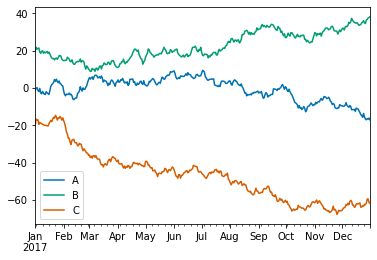

In [150]:
df.plot()


# Note: labels , legend

<font color = green >

### pandas scatter
</font>

<AxesSubplot:xlabel='A', ylabel='C'>

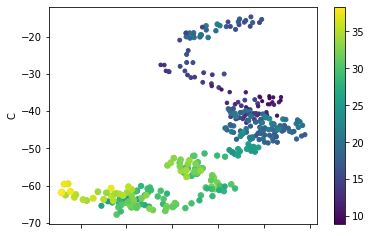

In [152]:
df.plot.scatter('A', 'C', c=df['B'], s=df['B'], colormap='viridis') 
# Note:: colorbar

<AxesSubplot:xlabel='A', ylabel='B'>

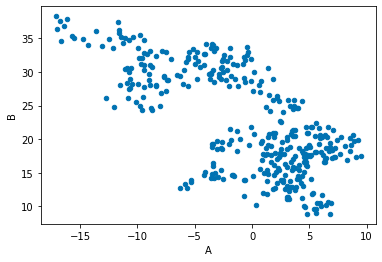

In [154]:
df.plot('A','B', kind = 'scatter')

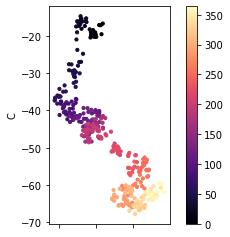

In [155]:
# alternative syntaxis df.plot.scatter instead of kind = 'scatter'
ax = df.plot.scatter('B', 'C', c=np.arange(len(df)), s=10, colormap='magma') # set color corresponding to index
# Note it return s axis object 
ax.set_aspect('equal') # to compare absolute ranges 

<font color = green >

### pandas histogram
</font>

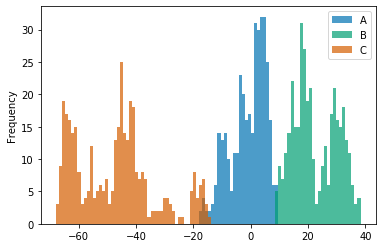

In [381]:
df["A"].plot.hist(alpha=0.7, bins=100);

<font color = green >

### kernel density estimate
</font>

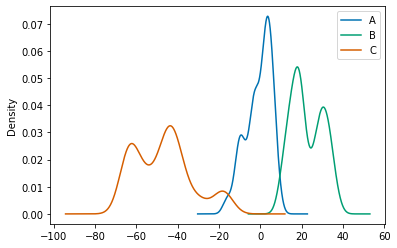

In [373]:
df.plot.kde() # kernel density estimate:  estimates the probability density function of a random variable


#### Converting to Datetime

In [407]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
df = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
df

,a,b
2 June 2013,34,86
"Aug 29, 2014",37,80
2015-06-26,65,77
7/12/16,14,54


In [408]:
df.index = pd.to_datetime(df.index)
df

,a,b
2013-06-02,34,86
2014-08-29,37,80
2015-06-26,65,77
2016-07-12,14,54


In [409]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

#### Timedeltas

In [410]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [412]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

#### Working with Dates in a Dataframe

In [422]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [423]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,105,116
2016-10-16,113,125
2016-10-30,116,121
2016-11-13,116,124
2016-11-27,114,115
2016-12-11,113,128
2016-12-25,118,115
2017-01-08,122,120
2017-01-22,126,118


In [448]:
dates = pd.date_range('10-01-2016', periods=9, freq='3D')
pd.DataFrame({'day': dates.weekday, 'day_name': dates.day_name()}, index=dates) 



,day,day_name
2016-10-01,5,Saturday
2016-10-04,1,Tuesday
2016-10-07,4,Friday
2016-10-10,0,Monday
2016-10-13,3,Thursday
2016-10-16,6,Sunday
2016-10-19,2,Wednesday
2016-10-22,5,Saturday
2016-10-25,1,Tuesday


---

# Home task: pandas 

lesson_3_hometask_pandas 


---

# Learm more 
- [Pandas Tutorial: DataFrames in Python](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python) - with examples and interactive mode 
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Presentation “pandas: Powerful data analysis tools for Python”](https://www.slideshare.net/wesm/pandas-powerful-data-analysis-tools-for-python) 
- [Introduction to Data Science in Python](https://www.coursera.org/learn/python-data-analysis)
- [Merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html)
- [Documentation “pandas: powerful Python data analysis toolkit”](https://pandas.pydata.org/pandas-docs/version/0.22/index.html)  


---

Next: lesson_4_visualization